In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
meta = pd.read_csv(r"./data/FRED/FRED3_Column_Definitions_2021.csv", index_col=0, usecols=("column_id", "name"))
taxon_lookup = pd.read_csv(r"./data/plantlookup.csv", low_memory=False, encoding="latin")

In [9]:
COLLABORATION_GRADIENT_TRAITS = [
    "F00679", # RD
    "F00727", # SRL
    "F00718", #	Specific root area (SRA)
    "F00104", # RCT
    "F00622", # Mycorrhiza_Fraction root length colonized by AM mycorrhizae
    "F00626", # Mycorrhiza_Fraction root length colonized by EM mycorrhizae
    "F00638", # Mycorrhiza_Fraction of root length
    "F00645"  # Mycorrhiza_Type_Data
]

CONSERVATION_GRADIENT_TRAITS = [
    "F00709", # RTD
    "F00277", #	Root P content
    "F00261", # Root N content
    "F00358"  # Root lignin content
]

In [7]:
(fred.F00018 == "Hordeum").sum()

np.int64(40)

In [14]:
fred.query("F00018==\"Hordeum\"").loc[:, ["F00018", "F00019", "F00056"] + CONSERVATION_GRADIENT_TRAITS + COLLABORATION_GRADIENT_TRAITS].isna().mean()

F00018    0.00
F00019    0.00
F00056    1.00
F00709    0.90
F00277    1.00
F00261    1.00
F00358    1.00
F00679    0.60
F00727    0.70
F00718    0.95
F00104    1.00
F00622    1.00
F00626    1.00
F00638    1.00
F00645    0.45
dtype: float64

In [18]:
h_leporinum = fred.query("F00018==\"Hordeum\"").loc[:, ["F00018", "F00019", "F00679", "F00727"]].dropna()

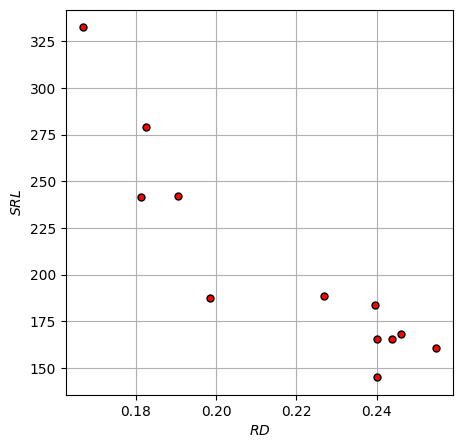

In [32]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
axes.scatter(x=h_leporinum.F00679, y=h_leporinum.F00727, color="red", edgecolor="black", s=25)
axes.set_xlabel("$RD$")
axes.set_ylabel("$SRL$")
axes.set_axisbelow(b=True)
axes.grid()
plt.show()